In [1]:
import torchvision.models as models
import torch.optim as optim
import time
import torch
import torch.nn as nn
from Train import trainmodel
time1 = time.time()
print(time1)
batch_size = [36]
device = 8
model_name_list = ["untran-resnet101"]
model1 = models.resnet101(pretrained=False)
model1

1591154592.8666778


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [2]:
model1.fc = nn.Linear(2048,6)
model1

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

untran-resnet101
1768 328
Epoch: 1
Epoch: 001, Training: Loss: 1.6738, Accuracy: 39.6493%,Valid: Loss: 1.4399, Accuracy: 44.8171%,Time: 24.6933s
Epoch: 2
Epoch: 002, Training: Loss: 1.5512, Accuracy: 34.1629%,Valid: Loss: 1.5504, Accuracy: 32.9268%,Time: 23.7848s
Epoch: 3
Epoch: 003, Training: Loss: 1.4647, Accuracy: 38.0656%,Valid: Loss: 1.4909, Accuracy: 33.8415%,Time: 23.7648s
Epoch: 4
Epoch: 004, Training: Loss: 1.3994, Accuracy: 39.8756%,Valid: Loss: 1.4264, Accuracy: 41.1585%,Time: 23.7157s
Epoch: 5
Epoch: 005, Training: Loss: 1.3840, Accuracy: 41.7986%,Valid: Loss: 1.4674, Accuracy: 36.8902%,Time: 24.1229s
Epoch: 6
Epoch: 006, Training: Loss: 1.3835, Accuracy: 41.5158%,Valid: Loss: 1.4465, Accuracy: 34.1463%,Time: 23.7361s
Epoch: 7
Epoch: 007, Training: Loss: 1.4229, Accuracy: 38.9140%,Valid: Loss: 1.4367, Accuracy: 39.0244%,Time: 23.7305s
Epoch: 8
Epoch: 008, Training: Loss: 1.3344, Accuracy: 44.7964%,Valid: Loss: 1.3687, Accuracy: 42.0732%,Time: 26.6503s
Epoch: 9
Epoch: 009, T

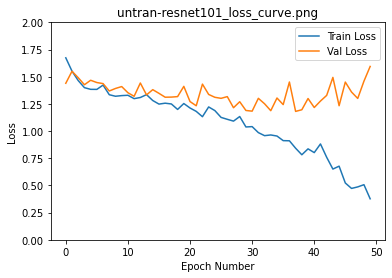

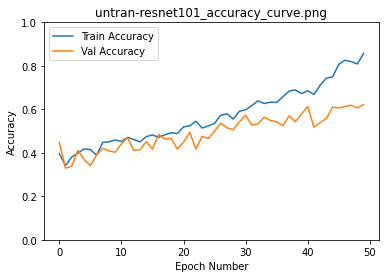

RuntimeError: CUDA error: out of memory

In [3]:
model_list = [model1]
lossfunc = torch.nn.CrossEntropyLoss().cuda(device)
for size in batch_size:
    i = 0
    for models in model_list:
        file_name = model_name_list[i]
        print(file_name)
        optimizer = optim.Adam(models.parameters())
        trainmodel(model_name=models,loss = lossfunc,batchsize=size,opti=optimizer,\
                   epoch_num=50,device_num=device,filename=file_name)
        i+=1